In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [24]:
# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

In [25]:
# Select two features for this exercise
selected_features = [0, 2]  # Select the first and third features (sepal length and petal length)

# Extract the selected features from the data
selected_data = data[:, selected_features]

In [26]:
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

In [27]:
# Calculate the condensed distance matrix
distance_matrix = pdist(scaled_data)

In [28]:
# Helper function to plot dendrogram
def plot_dendrogram(Z, method, metric):
    plt.figure(figsize=(12, 8))
    plt.title(f'Dendrogram ({method}, {metric})')
    dendrogram(Z, leaf_font_size=10, labels=np.arange(len(data)), orientation='top', leaf_rotation=90)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

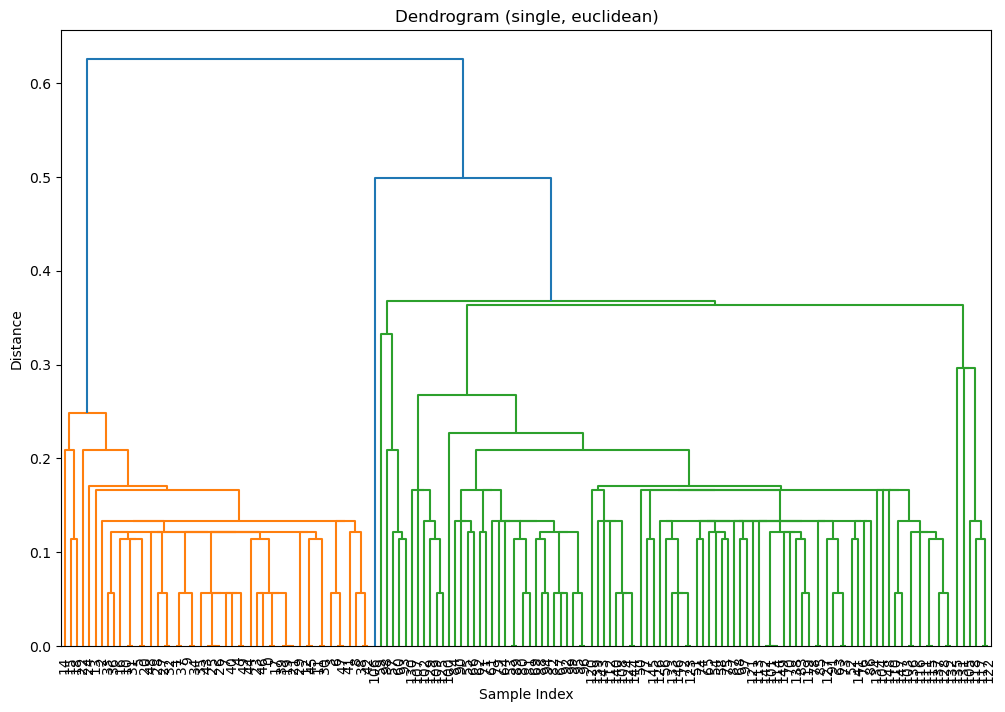

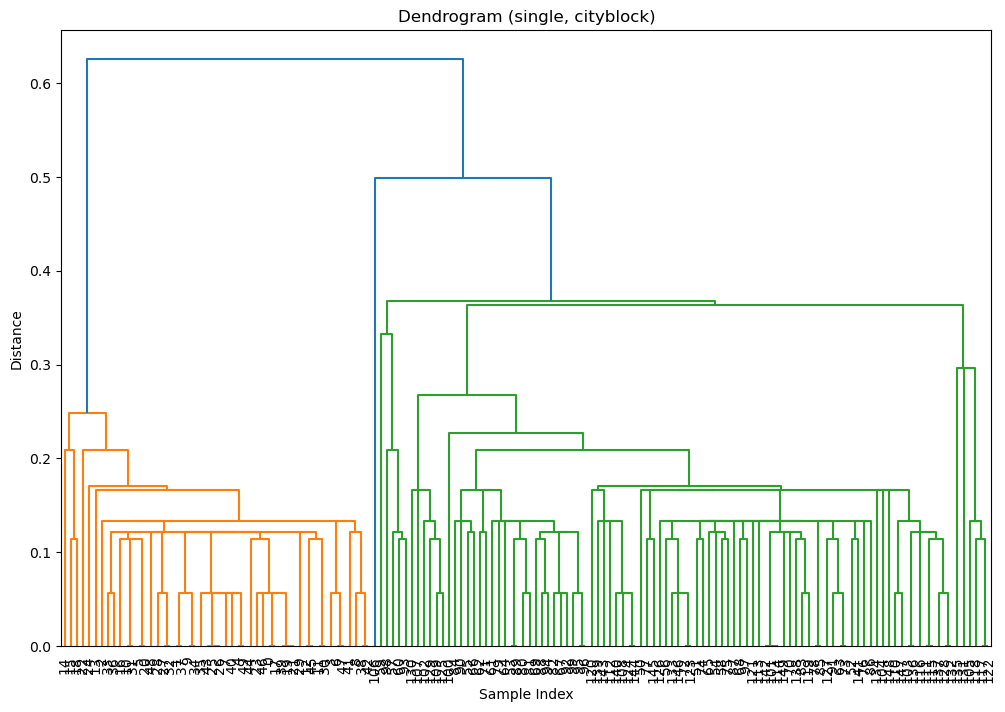

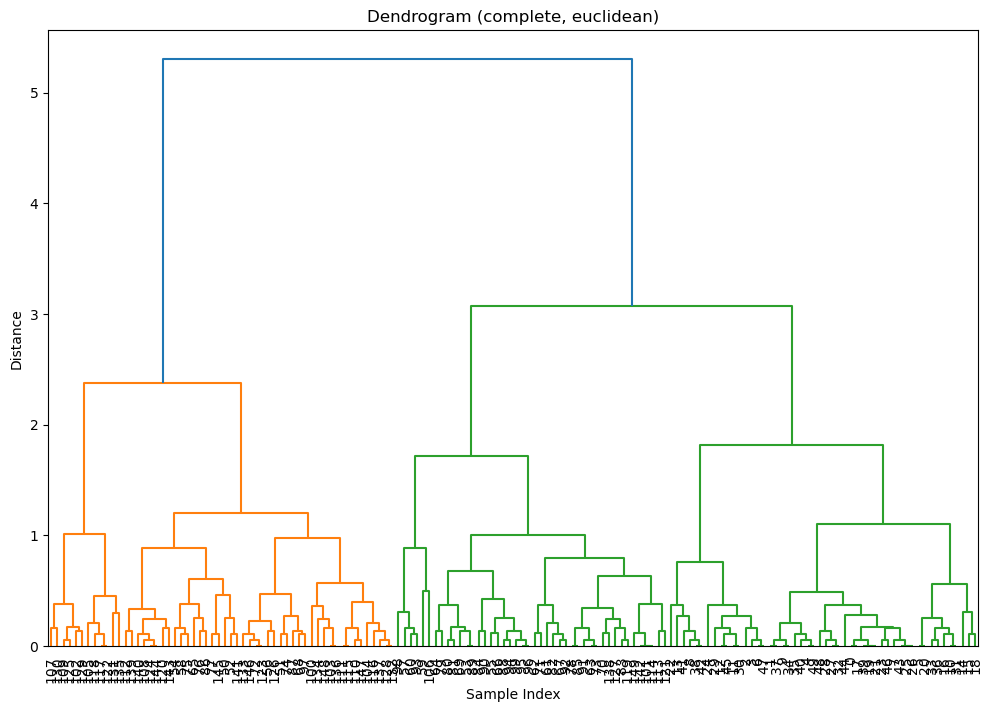

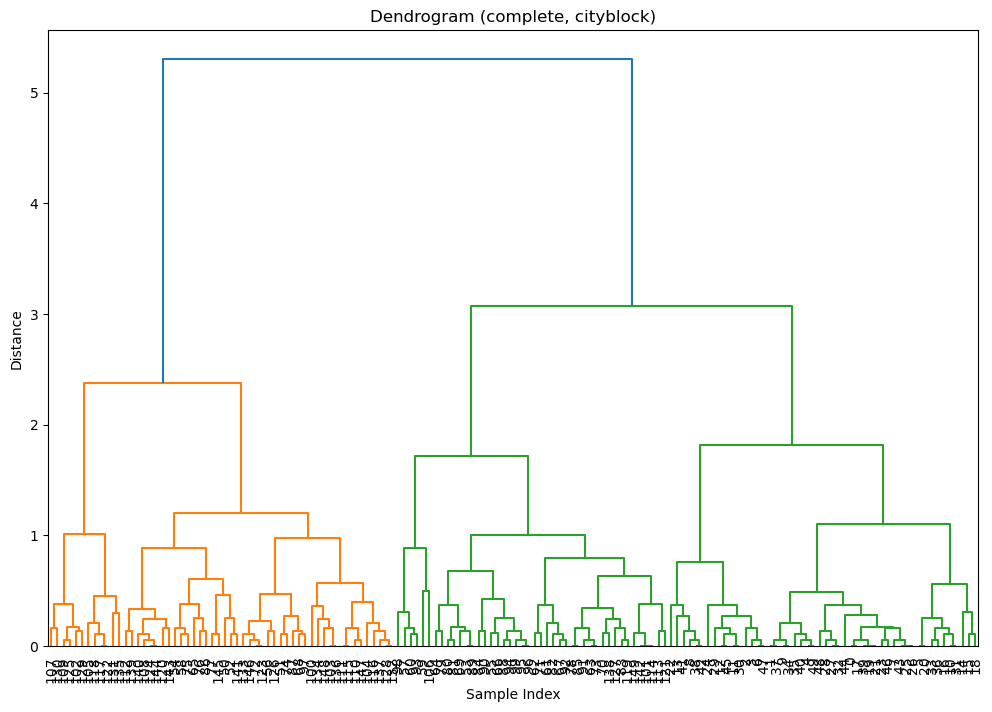

In [29]:
# Perform hierarchical clustering and plot dendrograms
methods = ['single', 'complete']
metrics = ['euclidean', 'cityblock']

for method in methods:
    for metric in metrics:
        Z = linkage(distance_matrix, method=method, metric=metric)
        plot_dendrogram(Z, method, metric)

In [30]:
# Selecting one dendrogram for further analysis (e.g., 'single' linkage with 'euclidean' metric)
selected_method = 'single'
selected_metric = 'euclidean'
Z = linkage(distance_matrix, method=selected_method, metric=selected_metric)


In [37]:
# Choose a fixed number of clusters based on the dendrogram
num_clusters = 3  # You can choose a different number of clusters if desired

In [38]:
# Run agglomerative hierarchical clustering with the chosen number of clusters
clusters = fcluster(Z, t=num_clusters, criterion='maxclust')

In [39]:
# Verify the clusters using silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.433862469635777


A silhouette score of 0.433.., indicates that the clustering solution is reasonable, with moderately well-defined clusters. However, the score is not close to 1, suggesting that some data points may be assigned to the wrong clusters, or there could be overlaps between clusters.